Import

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import tensorflow as tf
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline


Calling the file

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_dir = '/content/drive/MyDrive/DataMining/kickstarter.csv'
data = pd.read_csv(data_dir)


Mounted at /content/drive


Checking

In [ ]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Cleaning and Preprocessing

In [ ]:
unneeded_columns = ['ID', 'name']

data = data.drop(unneeded_columns, axis=1)

In [ ]:
data.isna().sum()


,0
category,0
main_category,0
currency,0
deadline,0
goal,0
launched,0
pledged,0
state,0
backers,0
country,0


In [ ]:
data['usd pledged'] = data['usd pledged'].fillna(data['usd pledged'].mean())


In [ ]:
data.isna().sum().sum()


0

In [ ]:
data['state'].unique()


array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [ ]:
values_to_drop = ['canceled', 'live', 'undefined','suspended']
data = data[~data['state'].isin(values_to_drop)]
data.head()




,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00


In [ ]:
data['state'].unique()

array(['failed', 'successful'], dtype=object)

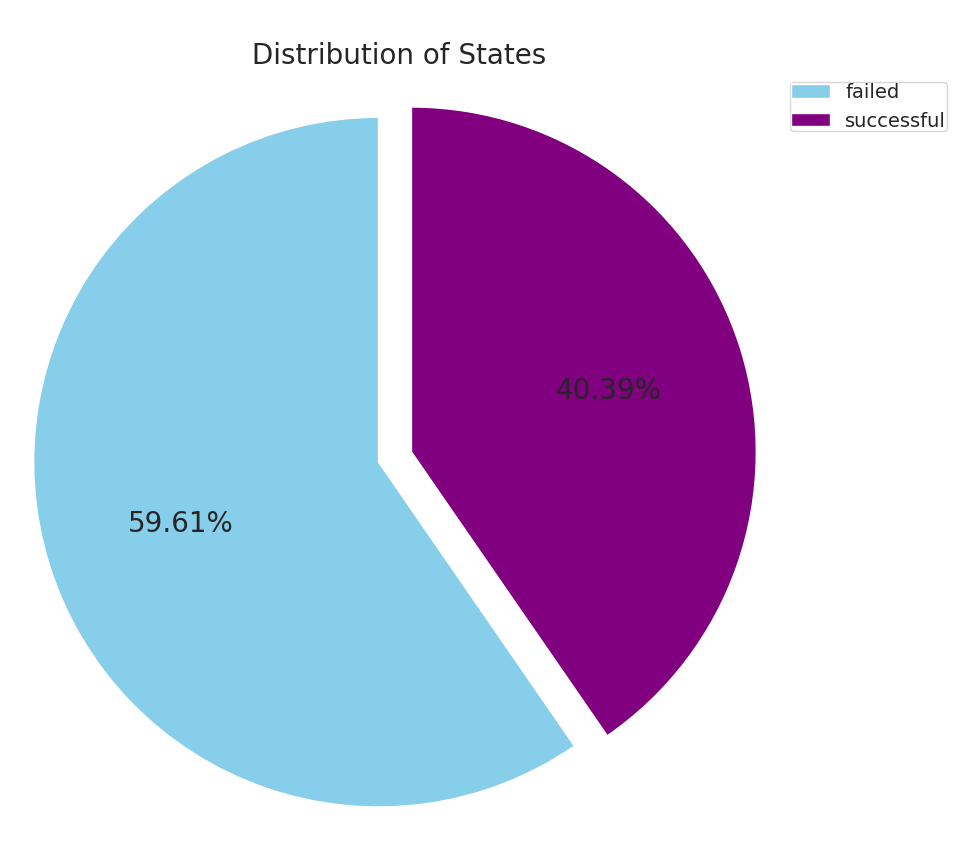

In [ ]:
state = data.state.value_counts() #choosing information to display in graph
# Pie chart
labels = state. index #setting Labels
sizes = state.values #setting values
colors = [ 'SkyBlue' , 'purple'] #stylistic choices
explode = [0,0.1]
fig1, ax1 = plt.subplots(figsize = (8, 8)) #creating pie chart, setting size
patches, texts, autotext = ax1.pie(sizes, colors=colors, startangle=90, autopct='%0.2f%%', explode=explode, textprops={'fontsize': 20})# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.legend (labels, loc= 2,borderpad=0.05, fontsize = 14, bbox_to_anchor=(1,1)) #creating Legend
plt.title('\n Distribution of States', fontsize = 20) #title
plt.show()

<ipython-input-68-9e7eafe7a1ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=maincat.index, x=maincat.values, palette="rocket", alpha=0.8) #type of graph is barplot, setting × and y vals plt.title( 'Distribution of Kickstarter Main Categories \n') #title ax.set (xlabel='Number of Campaigns' , ylabel='Categories') #Labels


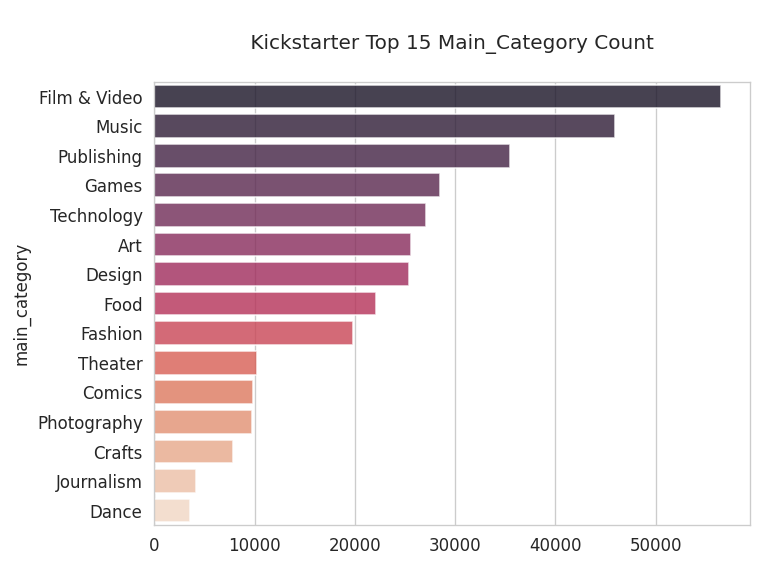

In [ ]:
sns.set_style('whitegrid') #setting style
maincat = data.main_category.value_counts() #referencing my main category data by count per category
fig = plt. figure(dpi=120) #stylistic choices, figure size
ax = fig.add_subplot (111)
ax = sns.barplot(y=maincat.index, x=maincat.values, palette="rocket", alpha=0.8) #type of graph is barplot, setting × and y vals plt.title( 'Distribution of Kickstarter Main Categories \n') #title ax.set (xlabel='Number of Campaigns' , ylabel='Categories') #Labels
plt. title('\n Kickstarter Top 15 Main_Category Count \n') #title ax.set(xlabel='Number of Campaigns', ylabel='Sub-Categories') #Labeling both plt. show()
plt. show()

In [ ]:
data.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00


Feature Engineering and Encoding

In [ ]:
# Convert 'deadline' and 'launched' columns to datetime objects
data['deadline'] = pd.to_datetime(data['deadline'])
data['launched'] = pd.to_datetime(data['launched'])

# Now, calculate the span of the project
data['span_of_project'] = (data['deadline'] - data['launched']).dt.days

# Extract year and month using Timestamp attributes
data['deadline_year'] = data['deadline'].dt.year
data['deadline_month'] = data['deadline'].dt.month

data['launched_year'] = data['launched'].dt.year
data['launched_month'] = data['launched'].dt.month

data = data.drop(['deadline', 'launched'], axis=1)



In [ ]:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}


{'category': ['Poetry',
  'Narrative Film',
  'Music',
  'Restaurants',
  'Food',
  'Drinks',
  'Nonfiction',
  'Indie Rock',
  'Crafts',
  'Games',
  'Tabletop Games',
  'Design',
  'Comic Books',
  'Art Books',
  'Fashion',
  'Childrenswear',
  'Theater',
  'Comics',
  'DIY',
  'Webseries',
  'Animation',
  'Food Trucks',
  'Product Design',
  'Public Art',
  'Documentary',
  'Illustration',
  'Photography',
  'Pop',
  'People',
  'Art',
  'Family',
  'Fiction',
  'Film & Video',
  'Accessories',
  'Rock',
  'Hardware',
  'Software',
  'Weaving',
  'Web',
  'Jazz',
  'Ready-to-wear',
  'Festivals',
  'Video Games',
  'Anthologies',
  'Publishing',
  'Shorts',
  'Gadgets',
  'Electronic Music',
  'Radio & Podcasts',
  'Cookbooks',
  'Apparel',
  'Metal',
  'Comedy',
  'Hip-Hop',
  'Periodicals',
  'Dance',
  'Technology',
  'Painting',
  'World Music',
  'Photobooks',
  'Drama',
  'Architecture',
  'Young Adult',
  'Latin',
  'Mobile Games',
  'Flight',
  'Fine Art',
  'Action',
  'Pl

In [ ]:
data = data[data['country'] != 'N,O"']

In [ ]:
data['state'] = data['state'].apply(lambda x: 1 if x == 'successful' else 0)


In [ ]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        # Check if column exists before proceeding. If not print a message
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in DataFrame. Skipping...")
            continue  # Skip to the next column
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
data = onehot_encode(
    data,
    ['category', 'main_category', 'currency', 'country'],
    ['cat', 'main_cat', 'curr', 'country']
)

In [ ]:
data


,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,span_of_project,deadline_year,deadline_month,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,0.0,0,0,0.0,0.0,1533.95,58,2015,10,...,False,False,False,False,False,False,False,False,False,False
1,30000.0,2421.0,0,15,100.0,2421.0,30000.00,59,2017,11,...,False,False,False,False,False,False,False,False,False,True
2,45000.0,220.0,0,3,220.0,220.0,45000.00,44,2013,2,...,False,False,False,False,False,False,False,False,False,True
3,5000.0,1.0,0,1,1.0,1.0,5000.00,29,2012,4,...,False,False,False,False,False,False,False,False,False,True
5,50000.0,52375.0,1,224,52375.0,52375.0,50000.00,34,2016,4,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,6500.0,154.0,0,4,0.0,154.0,6500.00,29,2017,4,...,False,False,False,False,False,False,False,False,False,True
378657,1500.0,155.0,0,5,155.0,155.0,1500.00,26,2011,7,...,False,False,False,False,False,False,False,False,False,True
378658,15000.0,20.0,0,1,20.0,20.0,15000.00,45,2010,8,...,False,False,False,False,False,False,False,False,False,True
378659,15000.0,200.0,0,6,200.0,200.0,15000.00,30,2016,2,...,False,False,False,False,False,False,False,False,False,True


Splitting and Scaling

In [ ]:
y = data.loc[:, 'state']
X = data.drop('state', axis=1)

In [ ]:
to_drop = [  'backers','usd pledged','usd_pledged_real','goal', 'pledged', 'state']
data = data.drop(to_drop, axis=1)

In [ ]:

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=34)

Modeling and Training


In [ ]:
X.shape


(331675, 222)

In [ ]:
y.mean()


0.4038772895153388

In [ ]:
from sklearn.utils import class_weight

# Assuming y_train is a pandas Series or a numpy array
classes = y_train.unique() # or np.unique(y_train) if it's a numpy array
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# Now convert class_weights to a dictionary
class_weights = dict(enumerate(class_weights))

print(class_weights)

{0: 0.8394874242489985, 1: 1.236404302907658}


In [ ]:
data.head()

,usd_goal_real,span_of_project,deadline_year,deadline_month,launched_year,launched_month,cat_3D Printing,cat_Academic,cat_Accessories,cat_Action,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1533.95,58,2015,10,2015,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,30000.00,59,2017,11,2017,9,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,45000.00,44,2013,2,2013,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,5000.00,29,2012,4,2012,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,50000.00,34,2016,4,2016,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:

inputs = tf.keras.Input(shape=(222,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

# Ensure data types are consistent between y_train and class_weights_dict
y_train = np.array(y_train)  # Convert y_train to numpy array (if not already)
y_train = y_train.astype(int)  # Convert labels to integers (if required)

# Define class weights dictionary (example structure)
class_weights_dict = {0: 1.0, 1: 2.0}  # Make sure this matches your y_train labels

# Training configuration
batch_size = 64
epochs = 100

# Train the model with EarlyStopping
history = model.fit(
    X_train,  # Your input data
    y_train,  # Your target data
    validation_split=0.2,
    class_weight=class_weights_dict,  # Pass class weights
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True,
            verbose=1
        )
    ],
    verbose=2
)


Epoch 1/100
2903/2903 - 9s - 3ms/step - accuracy: 0.6976 - auc: 0.7975 - loss: 0.7710 - val_accuracy: 0.8017 - val_auc: 0.8940 - val_loss: 0.4584
Epoch 2/100
2903/2903 - 8s - 3ms/step - accuracy: 0.8134 - auc: 0.8973 - loss: 0.5905 - val_accuracy: 0.8485 - val_auc: 0.9292 - val_loss: 0.3927
Epoch 3/100
2903/2903 - 10s - 4ms/step - accuracy: 0.8422 - auc: 0.9225 - loss: 0.5161 - val_accuracy: 0.8697 - val_auc: 0.9438 - val_loss: 0.3427
Epoch 4/100
2903/2903 - 14s - 5ms/step - accuracy: 0.8547 - auc: 0.9350 - loss: 0.4683 - val_accuracy: 0.8814 - val_auc: 0.9519 - val_loss: 0.3088
Epoch 5/100
2903/2903 - 6s - 2ms/step - accuracy: 0.8631 - auc: 0.9424 - loss: 0.4365 - val_accuracy: 0.8895 - val_auc: 0.9578 - val_loss: 0.2846
Epoch 6/100
2903/2903 - 7s - 3ms/step - accuracy: 0.8689 - auc: 0.9476 - loss: 0.4146 - val_accuracy: 0.8912 - val_auc: 0.9613 - val_loss: 0.2747
Epoch 7/100
2903/2903 - 8s - 3ms/step - accuracy: 0.8738 - auc: 0.9513 - loss: 0.4003 - val_accuracy: 0.8990 - val_auc: 0.

In [ ]:
# Convert y_test to a numpy array with the correct shape
y_test = np.asarray(y_test).astype('float32')
y_test = y_test.reshape(-1, 1) # Reshape y_test to have shape (num_samples, 1)

# Evaluate the model
model.evaluate(X_test, y_test)

3110/3110 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9416 - auc: 0.9874 - loss: 0.1551


[0.1574978232383728, 0.9402028322219849, 0.9868438243865967]

In [ ]:
# Import necessary modules

# For train-test split and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
%%time
#using the time function to see how long it takes each classifier to run
# declare a logistic regression classifier
lr = LogisticRegression(penalty='l2', solver='liblinear') #Liblinear supports l2 regularization
# Fit the model
fit = lr.fit(X_train, y_train)
pred_y = lr. predict(X_test)
lrs = round(lr. score(X_test, y_test)*100,2) #format accuracy score
print('\nAccuracy Percentage:',lrs)



Accuracy Percentage: 90.02
CPU times: user 6min 19s, sys: 1.17 s, total: 6min 20s
Wall time: 6min 25s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print('\n Actual vs. Predicted \n')  # Confusion matrix title
print(pd.crosstab(y_test, pred_y, rownames=['True'], colnames=['Predicted'], margins=True))
print('\n\n\n', classification_report(y_test, pred_y))


 Actual vs. Predicted 

Predicted      0      1    All
True                          
0          56783   2654  59437
1           7276  32790  40066
All        64059  35444  99503



               precision    recall  f1-score   support

           0       0.89      0.96      0.92     59437
           1       0.93      0.82      0.87     40066

    accuracy                           0.90     99503
   macro avg       0.91      0.89      0.89     99503
weighted avg       0.90      0.90      0.90     99503



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Initialize Gradient Boosting Classifier
clf_gb = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages
    max_depth=1,       # Maximum depth of the individual estimators
    random_state=0     # Random seed for reproducibility
)

# Train the model
clf_gb.fit(X_train, y_train)

# Evaluate the accuracy
clf_gb_score = round(clf_gb.score(X_test, y_test) * 100, 2)
print("Accuracy Percentage:", clf_gb_score)

# Generate predictions
pred_y_clf_gb = clf_gb.predict(X_test)

# Confusion Matrix
print('\n Actual vs. Predicted \n')
print(pd.crosstab(y_test, pred_y_clf_gb, rownames=['True'], colnames=['Predicted'], margins=True))

# Classification Report
print('\n\n', classification_report(y_test, pred_y_clf_gb))


Accuracy Percentage: 92.97

 Actual vs. Predicted 

Predicted      0      1    All
True                          
0          54474   4963  59437
1           2037  38029  40066
All        56511  42992  99503


               precision    recall  f1-score   support

           0       0.96      0.92      0.94     59437
           1       0.88      0.95      0.92     40066

    accuracy                           0.93     99503
   macro avg       0.92      0.93      0.93     99503
weighted avg       0.93      0.93      0.93     99503



In [ ]:

# Creating a DataFrame to compare results
models = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Gradient Boosting'
    ],
    'Score': [
        lrs,  # Logistic Regression score
        clf_gb_score,  # Gradient Boosting score

    ]
})

# Sorting the models by their score, from highest to lowest
models = models.sort_values(by='Score', ascending=False)
print(models)


                 Model  Score
1    Gradient Boosting  92.97
0  Logistic Regression  90.02


<Figure size 800x600 with 0 Axes>

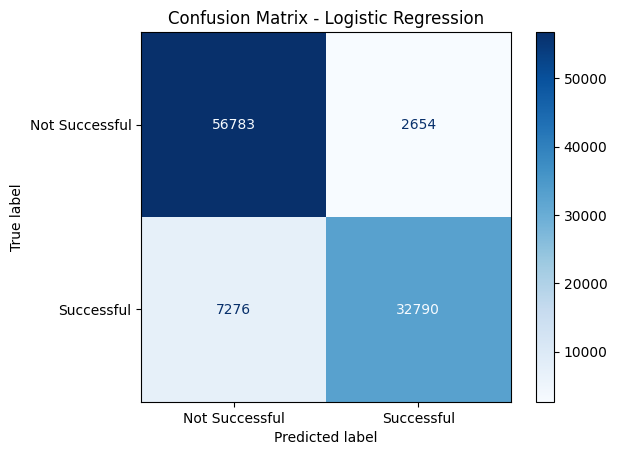

<Figure size 800x600 with 0 Axes>

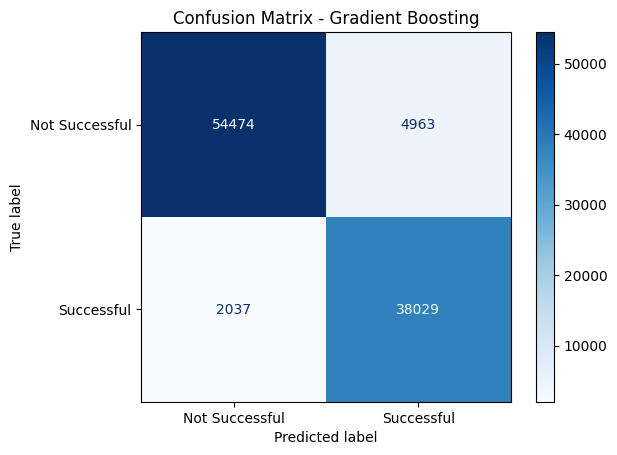

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix for Logistic Regression
# Replace 'logistic_regression' with 'lr' - this is the name of the Logistic Regression object created earlier
y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Not Successful', 'Successful'])
disp_lr.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Replace 'gradient_boosting_model' with 'clf_gb' -  this is the name of the Gradient Boosting object created earlier
y_pred_gb = clf_gb.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=['Not Successful', 'Successful'])
disp_gb.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()